<a href="https://colab.research.google.com/github/jessystem/An-lise_Games/blob/main/ANALISE_JOGOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importação das bibliotecas

# 🎮 Análise de Jogos  

Este repositório contém uma análise de dados sobre jogos, explorando tendências de vendas, gêneros populares e outros insights relevantes.  

## 📊 Sobre o projeto  
O objetivo deste projeto é utilizar **Python** e bibliotecas de análise de dados para examinar padrões no mercado de jogos. A análise inclui estatísticas de vendas, comparação entre gêneros e visualizações gráficas para facilitar a interpretação dos dados.  

## 🚀 Tecnologias utilizadas  
- **Python** 3
- **Pandas** – manipulação de dados  
- **Matplotlib & Seaborn** – visualização de dados  


## 📈 Principais análises realizadas  
- Evolução das vendas ao longo dos anos.  
- Comparação entre gêneros de jogos.  
- Identificação de padrões de mercado.  
- Visualizações gráficas para melhor interpretação dos dados.  


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importando a base

In [20]:
import kagglehub

caminho = kagglehub.dataset_download("anandshaw2001/video-game-sales", path="vgsales.csv")

df = pd.read_csv(caminho)

##Descrição dos dados

In [21]:
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [22]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [23]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


## 🗂 Estrutura das Variáveis  

| **Variável**     | **Descrição** |
|-----------------|--------------|
| **Rank**        | Posição do jogo no ranking de vendas. |
| **Name**        | Nome do jogo. |
| **Platform**    | Plataforma na qual o jogo foi lançado (ex: PS4, Xbox, PC). |
| **Year**        | Ano de lançamento do jogo. |
| **Genre**       | Gênero do jogo (ex: Ação, Esportes, RPG). |
| **Publisher**   | Empresa responsável pela publicação do jogo. |
| **NA_Sales**    | Vendas na América do Norte (em milhões de unidades). |
| **EU_Sales**    | Vendas na Europa (em milhões de unidades). |
| **JP_Sales**    | Vendas no Japão (em milhões de unidades). |
| **Other_Sales** | Vendas em outras regiões (em milhões de unidades). |
| **Global_Sales** | Vendas globais do jogo (em milhões de unidades). |

In [24]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

### Limpeza e transformação dos dados

Precisamos garantir que os dados que estamos analisando sejam precisos, caso contrário, os resultados de nossa análise estarão errados.

In [25]:
print(df.isnull().sum())  #valores ausentes em cada coluna

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [26]:
print(df.isnull().sum())  #valores ausentes em cada coluna

#Categorizando os valores em brancos com 'Desconhecido'
categorical_cols = df.select_dtypes(include=['object']).columns

# MEDIA NOS VALORES NULOS
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

df.dropna(inplace=True)

print("Valores ausentes:")
print(df.isnull().sum().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Valores ausentes:
0


In [27]:
print("Valores ausentes:")
print(df.isnull().sum().sum())

Valores ausentes:
0


##Gráficos

### Gráfico de vendas globais dos anos (1980 -1999)

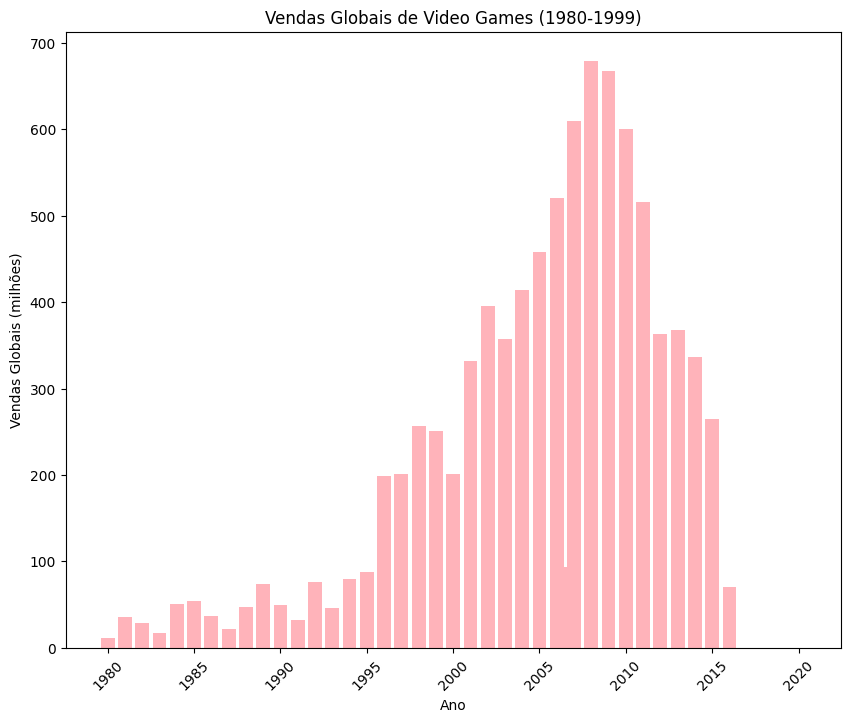

In [30]:
# Agrupando o DataFrame por ano e somar as vendas globais
df_agrupado = df.groupby("Year")["Global_Sales"].sum().reset_index()

cor_pastel = "#FFB3BA"  # Tom de rosa pastel

plt.figure(figsize=(10, 8))
plt.bar(df_agrupado["Year"], df_agrupado["Global_Sales"], color=cor_pastel)
plt.xlabel("Ano")
plt.ylabel("Vendas Globais (milhões)")
plt.title("Vendas Globais de Video Games (1980-1999)")
plt.xticks(rotation=45)
plt.show()

### Gráfico de consoles mais vendidos

<ipython-input-31-554315fc930e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.index, y=top_categorias.values, palette="rocket")


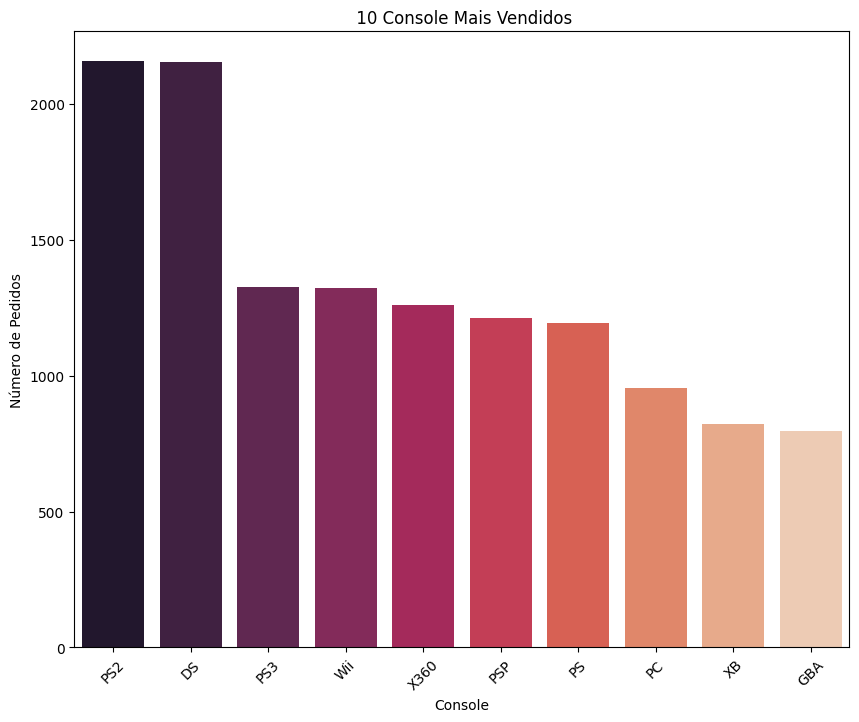

In [31]:
# Contar os consoles mais vendidos
top_categorias = df['Platform'].value_counts().head(10)

# Criar um gráfico de barras com cores
plt.figure(figsize=(10, 8))
sns.barplot(x=top_categorias.index, y=top_categorias.values, palette="rocket")
plt.xlabel('Console')
plt.ylabel('Número de Pedidos')
plt.title(' 10 Console Mais Vendidos')
plt.xticks(rotation=45)
plt.show()

### Gráfico por gênero

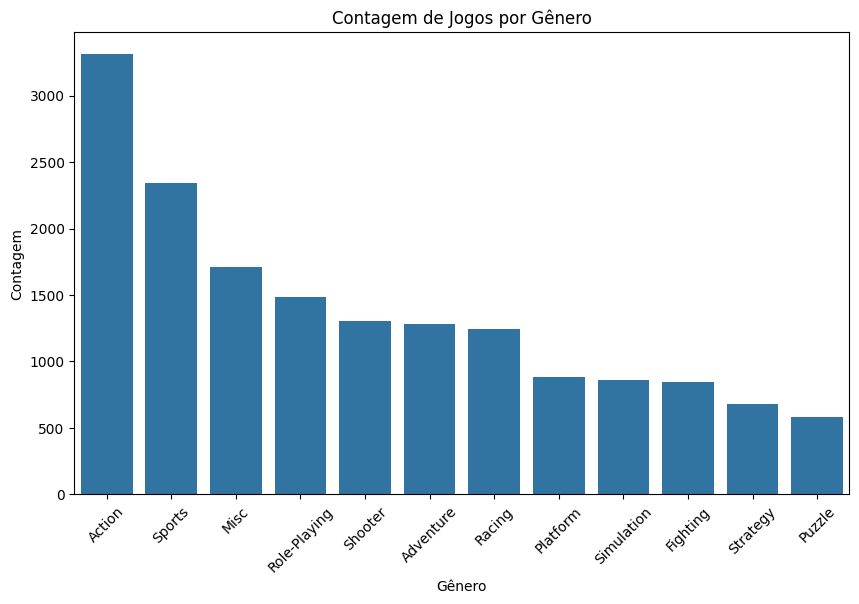

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Contagem de Jogos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()